<a href="https://colab.research.google.com/github/apgstocks/CaseStudy/blob/main/Ninjacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/ninjacart_data.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content/ninja')

  zip.close()
  print('Done')

Done


In [ ]:
drive.flush_and_unmount()

In [ ]:
#importing the tf
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_path='/content/ninja/ninjacart_data/train'
test_path='/content/ninja/ninjacart_data/test'
os.listdir(train_path)

['tomato', 'onion', 'indian market', 'potato']

In [ ]:
print('******Summary of Training set*****')
for sub_dir in os.listdir(train_path):
  dir=os.path.join(train_path,sub_dir)
  print('sub_directory '+sub_dir+' has '+str(len(os.listdir(dir)))+' files')

******Summary of Training set*****
sub_directory tomato has 789 files
sub_directory onion has 849 files
sub_directory indian market has 599 files
sub_directory potato has 898 files


Text(0.5, 0, 'Image classes')

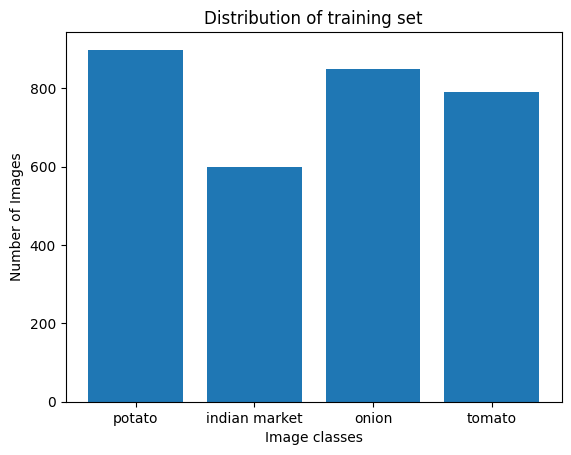

In [ ]:
x=[len(os.listdir(os.path.join(train_path,i))) for i in os.listdir(train_path)]
y=os.listdir(train_path)
plt.bar(y,x)
plt.title('Distribution of training set')
plt.ylabel('Number of Images')
plt.xlabel('Image classes')

Text(0.5, 0, 'Image classes')

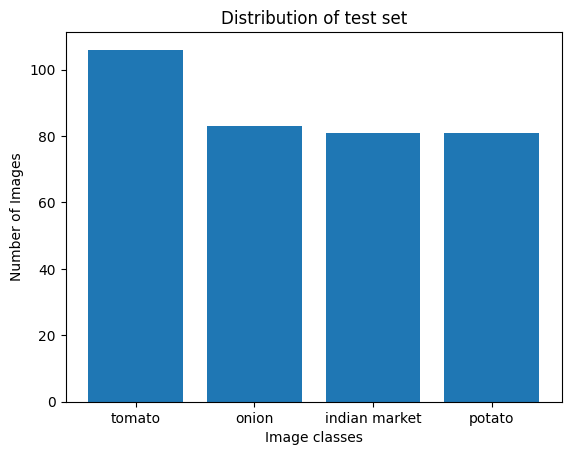

In [ ]:
x=[len(os.listdir(os.path.join(test_path,i))) for i in os.listdir(train_path)]
y=os.listdir(test_path)
plt.bar(y,x)
plt.title('Distribution of test set')
plt.ylabel('Number of Images')
plt.xlabel('Image classes')

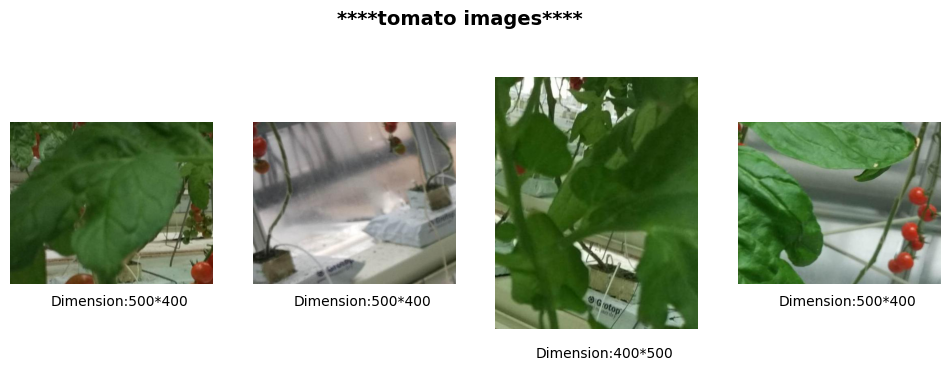

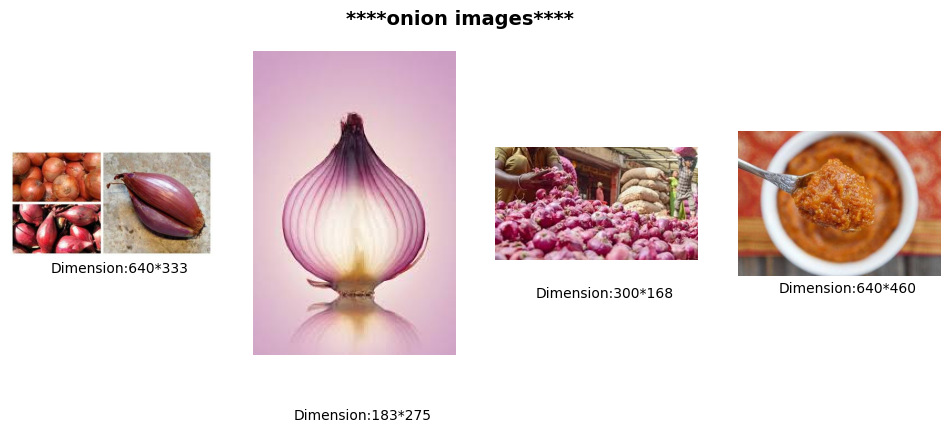

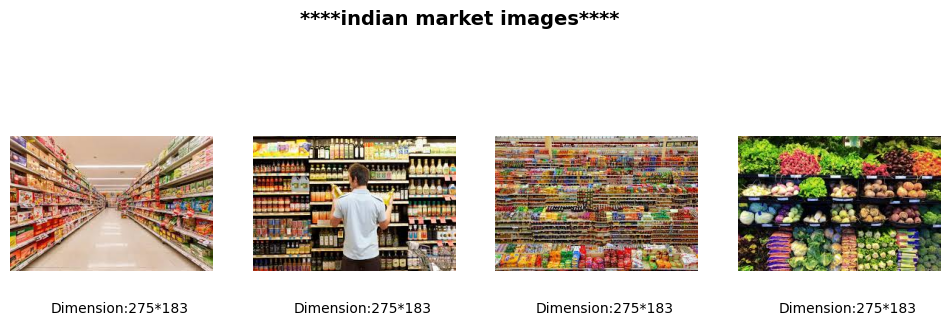

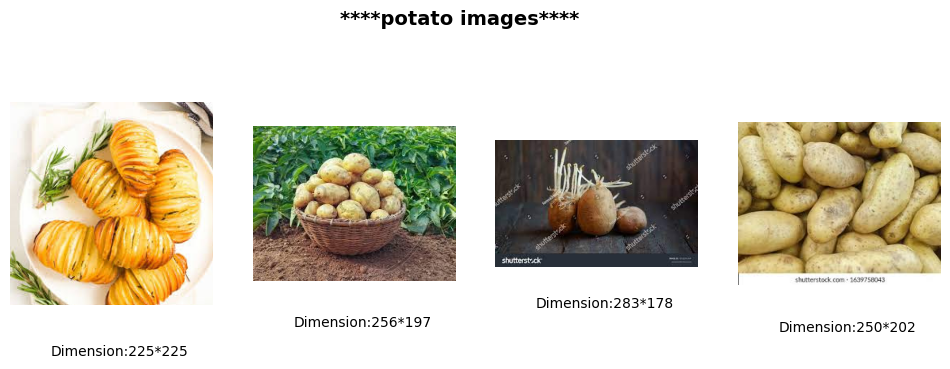

In [ ]:
from PIL import Image
for sub_dir in os.listdir(train_path):
  dir=os.path.join(train_path,sub_dir)
  #print('sub_directory '+sub_dir+' has '+str(len(os.listdir(dir)))+' files')
  img_to_display=os.listdir(dir)[:4]
  fig, axes = plt.subplots(1, 4, figsize=(12, 4))
  fig.suptitle('****'+str(sub_dir)+' images****', fontsize=14, fontweight='bold')
  for i,j in enumerate(img_to_display):
    #print(dir+i)
    img=Image.open(os.path.join(dir,j))
    width, height = img.size
    axes[i].imshow(img)
    axes[i].axis('off')
    #print(str(width)+'*'+str(height))
    #plt.figure(figsize=((10,8)))
    axes[i].text(width/5,height+60,'Dimension:'+str(width)+'*'+str(height),verticalalignment='bottom')
  plt.show()


In [ ]:
BATCH_SIZE = 128
tf.random.set_seed(10)
np.random.seed(10)
train_ds = tf.keras.utils.image_dataset_from_directory("/content/ninja/ninjacart_data/train",shuffle =True, seed=123,image_size=(224, 224),validation_split = 0.2,subset = 'training',batch_size=BATCH_SIZE)
val_ds   = tf.keras.utils.image_dataset_from_directory("/content/ninja/ninjacart_data/train",shuffle =False, seed=123,image_size=(224, 224),validation_split = 0.2,subset = 'validation',batch_size=BATCH_SIZE)
test_ds = tf.keras.utils.image_dataset_from_directory("/content/ninja/ninjacart_data/test",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Found 3135 files belonging to 4 classes.
Using 627 files for validation.
Found 351 files belonging to 4 classes.


In [ ]:
data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[ layers.Rescaling(1.0/255),layers.Resizing(224,224),]

)

train_ds = train_ds.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_ds.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
NUM_CLASSES = 4
image_size = (128, 128)
height, width = image_size
hidden_size1 = 256
hidden_size2 = 256

ann_model = keras.Sequential(
    name = 'ANN_Model',
    layers = [
        layers.Flatten(input_shape=(height, width, 3)),
        layers.Dense(units=hidden_size1, activation='relu'),
        layers.Dense(units=hidden_size2, activation='relu'),
        layers.Dense(units=NUM_CLASSES, activation='softmax')
    ]
)

ann_model.summary()

Model: "ANN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               12583168  
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 12,649,988
Trainable params: 12,649,988
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
BATCH_SIZE = 32
train_generator = ImageDataGenerator(rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.2,
                                     preprocessing_function=preprocess_input)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

traingen = train_generator.flow_from_directory('/content/ninja/ninjacart_data/train',
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               #subset='training',                                               subset='training',
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory('/content/ninja/ninjacart_data/train',
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               subset='validation',
                                               shuffle=True,
                                               seed=42)
testgen = test_generator.flow_from_directory('/content/ninja/ninjacart_data/test',
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=42)

Found 3135 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


In [ ]:
tf.config.run_functions_eagerly(True)
ann_history = ann_model.fit(traingen, epochs=5,validation_data=validgen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


98/98 [==============================] - 37s 375ms/step - loss: 1282.6766 - accuracy: 0.3088 - val_loss: 560.2596 - val_accuracy: 0.4375
Epoch 2/5
98/98 [==============================] - 33s 336ms/step - loss: 296.2823 - accuracy: 0.3850 - val_loss: 365.8430 - val_accuracy: 0.2949
Epoch 3/5
98/98 [==============================] - 34s 346ms/step - loss: 143.8355 - accuracy: 0.4201 - val_loss: 95.6049 - val_accuracy: 0.3766
Epoch 4/5
98/98 [==============================] - 35s 356ms/step - loss: 149.8840 - accuracy: 0.3885 - val_loss: 225.8704 - val_accuracy: 0.4503
Epoch 5/5
98/98 [==============================] - 34s 351ms/step - loss: 50.3426 - accuracy: 0.4348 - val_loss: 37.2755 - val_accuracy: 0.4391


In [ ]:
# Constants
NUM_CLASSES = 4
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
EPOCHS = 10

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze the base model's layers
vgg_model.trainable = False

# Create the model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

vgg_model = model
# Print model summary
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_____________________________________

In [ ]:
vgg_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_callback = TensorBoard(log_dir='/content/logs/vgg')

In [ ]:
history = vgg_model.fit(train_ds, epochs=5,validation_data=val_ds,callbacks=[vgg_callback])

Epoch 1/5
20/20 [==============================] - 159s 5s/step - loss: 2.2290 - accuracy: 0.5451 - val_loss: 0.1642 - val_accuracy: 0.9856
Epoch 2/5
20/20 [==============================] - 61s 3s/step - loss: 0.4547 - accuracy: 0.8146 - val_loss: 0.0643 - val_accuracy: 0.9872
Epoch 3/5
20/20 [==============================] - 61s 3s/step - loss: 0.3091 - accuracy: 0.8907 - val_loss: 0.0855 - val_accuracy: 0.9825
Epoch 4/5
20/20 [==============================] - 61s 3s/step - loss: 0.2286 - accuracy: 0.9187 - val_loss: 0.0499 - val_accuracy: 0.9872
Epoch 5/5
20/20 [==============================] - 62s 3s/step - loss: 0.1794 - accuracy: 0.9410 - val_loss: 0.0221 - val_accuracy: 0.9968


It seems like a overfit and hence lets try for fine tuning using data augmentation


In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.2,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing

In [ ]:
BATCH_SIZE = 32

traingen = train_generator.flow_from_directory('/content/ninja/ninjacart_data/train',
                                               target_size=INPUT_SHAPE[:2],
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               #subset='training',                                               subset='training',
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory('/content/ninja/ninjacart_data/train',
                                               target_size=INPUT_SHAPE[:2],
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               subset='validation',
                                               shuffle=True,
                                               seed=42)
testgen = test_generator.flow_from_directory('/content/ninja/ninjacart_data/test',
                                               target_size=INPUT_SHAPE[:2],
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=42)

Found 3135 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


In [ ]:
vgg_callback = TensorBoard(log_dir='/content/logs/vgg_tuned')
tl_checkpoint_1 = ModelCheckpoint(filepath='vggweights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)
n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = vgg_model.fit(traingen, steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,epochs=5,validation_data=validgen,callbacks=[vgg_callback,early_stop,tl_checkpoint_1])

Epoch 1/5
97/97 [==============================] - ETA: 0s - loss: 1.7814 - accuracy: 0.7232
Epoch 1: val_loss improved from inf to 0.47966, saving model to vggweights.best.hdf5
97/97 [==============================] - 121s 1s/step - loss: 1.7814 - accuracy: 0.7232 - val_loss: 0.4797 - val_accuracy: 0.8339
Epoch 2/5
97/97 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.7625
Epoch 2: val_loss did not improve from 0.47966
97/97 [==============================] - 98s 1s/step - loss: 0.6651 - accuracy: 0.7625 - val_loss: 0.4851 - val_accuracy: 0.8470
Epoch 3/5
97/97 [==============================] - ETA: 0s - loss: 0.6431 - accuracy: 0.8131
Epoch 3: val_loss improved from 0.47966 to 0.45235, saving model to vggweights.best.hdf5
97/97 [==============================] - 99s 1s/step - loss: 0.6431 - accuracy: 0.8131 - val_loss: 0.4524 - val_accuracy: 0.8701
Epoch 4/5
97/97 [==============================] - ETA: 0s - loss: 0.5508 - accuracy: 0.8073
Epoch 4: val_loss i

In [ ]:
from tensorflow.keras.applications import ResNet50,MobileNet

# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

#transfer learning
resnet_model.trainable = False

#Model
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model = model
#model summary
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_10 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 49,279,108
Trainable params: 25,691,396
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resnet_callback = TensorBoard(log_dir='/content/logs/resnet')

# Train the Resnet model
resnet_history = resnet_model.fit(
    traingen,
    validation_data=validgen,
    epochs=5,
    callbacks=[resnet_callback,early_stop]
)

Epoch 1/5
98/98 [==============================] - 92s 908ms/step - loss: 4.7832 - accuracy: 0.7675 - val_loss: 0.3984 - val_accuracy: 0.8974
Epoch 2/5
98/98 [==============================] - 92s 936ms/step - loss: 0.6380 - accuracy: 0.8207 - val_loss: 0.3134 - val_accuracy: 0.8878
Epoch 3/5
98/98 [==============================] - 82s 839ms/step - loss: 0.5175 - accuracy: 0.8303 - val_loss: 0.3434 - val_accuracy: 0.8750
Epoch 4/5
98/98 [==============================] - 85s 866ms/step - loss: 0.4611 - accuracy: 0.8450 - val_loss: 0.2959 - val_accuracy: 0.9071
Epoch 5/5
98/98 [==============================] - 92s 937ms/step - loss: 0.4155 - accuracy: 0.8625 - val_loss: 0.2714 - val_accuracy: 0.9022


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

mnet_model = MobileNet(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')

for layer in mnet_model.layers:
    layer.trainable = False


x = GlobalAveragePooling2D()(mnet_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)


mnet_model = Model(inputs=mnet_model.input, outputs=output)

mnet_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

In [ ]:
mnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
mnet_tensorboard_callback = TensorBoard(log_dir='/content/logs/mnet')

In [ ]:
mnet_history = mnet_model.fit(
    traingen,
    steps_per_epoch=len(traingen),
    epochs=5,
    validation_data=validgen,
    validation_steps=len(validgen),
    callbacks=[resnet_callback,early_stop]
)

Epoch 1/5
98/98 [==============================] - 72s 729ms/step - loss: 0.8544 - accuracy: 0.6201 - val_loss: 0.6455 - val_accuracy: 0.7260
Epoch 2/5
98/98 [==============================] - 74s 753ms/step - loss: 0.6359 - accuracy: 0.7346 - val_loss: 0.6605 - val_accuracy: 0.6971
Epoch 3/5
98/98 [==============================] - 72s 738ms/step - loss: 0.5813 - accuracy: 0.7563 - val_loss: 0.5843 - val_accuracy: 0.7628
Epoch 4/5
98/98 [==============================] - 72s 736ms/step - loss: 0.5850 - accuracy: 0.7557 - val_loss: 0.6789 - val_accuracy: 0.7179
Epoch 5/5
98/98 [==============================] - 73s 736ms/step - loss: 0.5598 - accuracy: 0.7675 - val_loss: 0.4948 - val_accuracy: 0.7981


In [ ]:
#VGG model
vgg_pred = vgg_model.predict(testgen)
vgg_predicted_labels = np.argmax(vgg_pred, axis=1)
vgg_true_labels = testgen.classes

11/11 [==============================] - 2s 231ms/step


In [ ]:


#ResNet model
resnet_pred = resnet_model.predict(testgen)
resnet_predicted_labels = np.argmax(resnet_pred, axis=1)
resnet_true_labels = testgen.classes



In [ ]:
resnet_predicted_labels
#resnet_true_labels

In [ ]:
#confusion matrix for vgg and resnet
from sklearn.metrics import confusion_matrix
vgg_confusion= confusion_matrix(vgg_true_labels, vgg_predicted_labels)


In [ ]:
resnet_confusion = confusion_matrix(resnet_true_labels, resnet_predicted_labels)

In [ ]:

# Make predictions with the MobileNet model
mnet_pred = mnet_model.predict(testgen)
mnet_predicted_labels = np.argmax(mnet_pred, axis=1)
mnet_true = testgen.classes
mnet_confusion = confusion_matrix(mnet_true, mnet_predicted_labels)

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='VGG Training Accuracy')
plt.plot(history.history['val_accuracy'], label='VGG Validation Accuracy')
plt.plot(resnet_history.history['accuracy'], label='ResNet Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet Validation Accuracy')
plt.plot(mnet_history.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(mnet_history.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#training and validation loss graph
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='VGG Training Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Validation Loss')
plt.plot(resnet_history.history['loss'], label='ResNet Training Loss')
plt.plot(resnet_history.history['val_loss'], label='ResNet Validation Loss')
plt.plot(mnet_history.history['loss'], label='MobileNet Training Loss')
plt.plot(mnet_history.history['val_loss'], label='MobileNet Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(testgen)
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(testgen)
test_loss_mnet, test_accuracy_mnet = mnet_model.evaluate(testgen)

print("VGG's Test Accuracy:", round(test_accuracy_vgg,2)*100)
print("ResNet's Test Accuracy:", round(test_accuracy_resnet,2)*100)
print("MobileNet's Test Accuracy:", round(test_accuracy_mnet,2)*100)

In [ ]:
def predict_image(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array = img_array / 255.0  # Normalize the image
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class


image_paths = [
    '/content/ninja/ninjacart_data/test/indian market/indianmarket20.jpeg',
    '/content/ninja/ninjacart_data/test/onion/28W1CL9LAL32.jpg',
    '/content/ninja/ninjacart_data/test/potato/potato1105.jpeg',
    '/content/ninja/ninjacart_data/test/tomato/tomato150.png',
    '/content/ninja/ninjacart_data/test/potato/potato1137 (1).jpeg',
    '/content/ninja/ninjacart_data/test/tomato/tomato172.png'
]


for image_path in image_paths:
    predicted_class_vgg = predict_image(vgg_model, image_path)
    predicted_class_resnet = predict_image(resnet_model, image_path)
    predicted_class_mnet = predict_image(mnet_model, image_path)

    print("For the Image:", image_path)
    print("VGG Model Prediction:", predicted_class_vgg)
    print("ResNet Model Prediction:", predicted_class_resnet)
    print("MobileNet Model Prediction:", predicted_class_mnet)


Summary & Insights:


Model Performance:

The VGG model achieved a test accuracy of 86%, MobileNet model has a test accuracy of 86% and the ResNet model achieved a test accuracy of 24%.

Comparison:

The MobileNet & VGG models have outperformed the ResNet model in terms of test accuracy.

Overfitting:

Overfitting can be observed to an extent in the model.However early stopping,dropout,augmentation helped in stablising it to an extent.

Performance on Random Image Samples:

The predictions of the models on random image samples suggest that they can successfully classify the given vegetable images. As this dataset is very small,the results could vary when we input large data

TensorBoard Logs:

Logs of the model is stored in tensorboard.By viewing the logs,one can take decision on tuning the hyperparameters in order to improve model efficiancy

Overall, based on the test accuracy and potential overfitting, the MobileNet and VGG models seem to perform better among the three for classifying the vegetable images. However, further optimization and fine-tuning can still be performed to improve the model's performance and generalize better to unseen data.